# Algoritmo colônia de formigas

# Exemplo de ACO para problem do caixeiro viajante
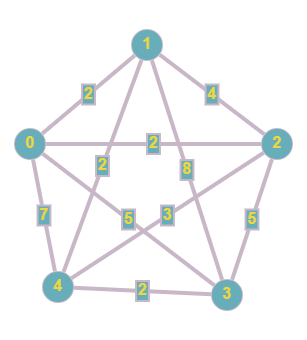


In [4]:
import random as rn
import numpy as np
from numpy.random import choice as np_choice

class AntColony(object):

    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        """
        Args:
             distâncias (2D numpy.array): Matriz quadrada de distâncias. Diagonal é considerado np.inf.
             n_ants (int): Número de formigas correndo por iteração
             n_best (int): Número das melhores formigas que depositam feromônio
             n_iteration (int): Número de iterações
             decaimento (flutuação): avalie qual feromônio decai. O valor do feromônio é multiplicado pelo decaimento, então 0,95 levará ao decaimento, 0,5 para um decaimento muito mais rápido.
             alpha (int ou float): exponente no feromônio, alfa mais alto dá mais peso ao feromônio. Padrão = 1
             beta (int ou float): expoente na distância, beta mais alto dá mais peso à distância. Padrão = 1
        Example:
            ant_colony = AntColony(german_distances, 100, 20, 2000, 0.95, alpha=1, beta=2)
        """
        self.distances  = distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            print (shortest_path)
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path
            self.pheromone = self.pheromone * self.decay
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0

        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move

import numpy as np

#from ant_colony import AntColony

distances = np.array([[np.inf, 2, 2, 5, 7],
                     [2, np.inf, 4, 8, 2],
                     [2, 4, np.inf, 5, 3],
                     [5, 8, 5, np.inf, 2],
                     [7, 2, 3, 2, np.inf]])

                      #( distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1)
ant_colony = AntColony(distances, 2, 2, 30, 0.95, alpha=1, beta=1)
shortest_path = ant_colony.run()
print ("Menor caminho: {}".format(shortest_path))

([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 17.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)
([(0, 2), (2, 1), (1, 4), (4, 3), (3, 0)], 15.0)
([(0, 2), (2, 4), (4, 3), (3, 1), (1, 0)], 17.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 13.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 13.0)
([(0, 1), (1, 4), (4, 2), (2, 3), (3, 0)], 17.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 13.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)
([(0, 2), (2, 1), (1, 4), (4, 3), (3, 0)], 15.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 13.0)
([(0, 2), (2, 1), (1, 4), (4, 3), (3, 0)], 15.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)
([(0, 2), (2, 4), (4, 3), (3, 1), (1, 0)], 17.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)
([(0, 1), (1, 4), (4

Soluções encontradas:
iteração 1: Menor caminho: ([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 13.0)

In [1]:
!pip install ACO-Pants

  Preparing metadata (setup.py) ... done
  Created wheel for ACO-Pants: filename=ACO_Pants-0.5.2-py3-none-any.whl size=18841 sha256=b5b1dad869e2f5022ceee17a9b35bc3be66e2a77a45169f638890ec7172061ad
  Stored in directory: /root/.cache/pip/wheels/18/20/45/4dc8bf8059c641765ecbbaf092ec25ad79f7deaa51662a68c8
Successfully built ACO-Pants


In [2]:
import pants
import math
import random

nodes=[]
# Gera grafo de 20 nós aleatóriamente
for _ in range(20):
  x=random.uniform(-10,10)
  y=random.uniform(-10,10)
  nodes.append((x,y))

# Função objetivo - Função que avalia cada formiga
def euclidean(a,b):
  return math.sqrt(pow(a[1]-b[1],2)+pow(a[0]-b[0],2))

world=pants.World(nodes,euclidean)

solver=pants.Solver(rho=0.5,q=1,t0=0.01,limit=50,ant_count=10)

solution=solver.solve(world)
print(solution.distance)
print(solution.tour)

solutions=solver.solutions(world)
best=float("inf")
for solution in solutions:
  assert solution.distance<best
  best=solution.distance
print(best)

89.80728317894689
[(5.195046658802214, 1.558613366088391), (9.039506324077877, 0.4758401832636956), (1.475773848990654, -1.5623608731981076), (6.019647789123038, -2.9663757595741957), (9.293373732584985, -7.350441308303384), (3.5079614032425077, -9.934502223855652), (-1.1707037229741086, -8.53277892162877), (-5.042672192940123, -6.786129937178201), (-7.53945544749778, -5.406258982267202), (-7.244924618103732, 0.4342094195085018), (-3.9980705150591707, 0.925144869490115), (-0.7978598995491346, 2.7940849921396236), (-4.008505086010301, 5.469780517948383), (-7.571396804893924, 3.524870859019412), (2.18248343143377, 5.091567221023132), (0.3246611378506987, 6.935841879896124), (2.519867413694799, 9.340235438338972), (5.573733971602513, 8.42389343195159), (7.89340551856769, 5.9666643468353975), (4.969718049145985, 4.132889125570507)]
95.20611119490331


In [ ]:
import random
import matplotlib.pyplot as plt

N = 10
l1 = 1.1
l2 = 1.5
ru = 0.05
Q = 1
tau1 = 0.5
tau2 = 0.5

samples = 10
epochs = 150

success = [0 for x in range(epochs)]

def compute_probability(tau1, tau2):
    return tau1/(tau1 + tau2), tau2/(tau1 + tau2)

def weighted_random_choice(choices):
    max = sum(choices.values())
    pick = random.uniform(0, max)
    current = 0
    for key, value in choices.items():
        current += value
        if current > pick:
            return key


def select_path(prob1, prob2):
    choices = {1: prob1, 2: prob2}
    return weighted_random_choice(choices)

def update_accumulation(link_id):
    global tau1
    global tau2
    if link_id == 1:
        tau1 += Q / l1
    else:
        tau2 += Q / l2

def update_evaporation():
    global tau1
    global tau2
    tau1 *= (1-ru)
    tau2 *= (1-ru)

def report_results(success):
    plt.ylim(0.0, 1.0)
    plt.xlim(0, 150)
    plt.plot(success)
    plt.show()

for sample in range(samples):
    for epoch in range(epochs):
        temp = 0
        for ant in range(N):
            prob1, prob2 = compute_probability(tau1, tau2)
            selected_path = select_path(prob1, prob2)
            if selected_path == 1:
                temp += 1
            update_accumulation(selected_path)
            update_evaporation()
        ratio = ((temp + 0.0) / N)
        success[epoch] += ratio
    # reset pheromone values here to evaluate new sample
    tau1 = 0.5
    tau2 = 0.5

success = [x / samples for x in success]

for x in success:
    print(x)

report_results(success)